1. Monthly average of 5 stock indexes (CSI 300, Finance, growth, cycle, consumption). Average the industrial added value of January and February each year, and then replace the original January and February values with the average. The data on investment growth, which is missing each year in January, is filled in with the data for February.

2. Find the outliers and fil it with the average of previous and next number.

3. Calculate the correlation coefficient between the 5 stock index data and M2 data respectively. 

4. The 5 stock index data are respectively used as dependent variables, and the independent variables of CPI, M2, industrial added value and fixed asset investment growth rate are regression.

5. Mark all stages with CPI greater than 1.5 and M2 greater than 8, count the number of stages (the stage starts once the conditions are met, and the stage ends once the conditions are no longer met), then calculate the return rate of CSI 300 stock index in each stage, and then calculate the average return rate of stock index in all stages.

In [229]:
import numpy as np
import pandas as pd
index = pd.read_csv(r'C:\Users\zhu\Desktop\python/index.csv')
index.head()

,Date,SSE Composite Index,Shanghai SE A Share (SSEA),CSI 300 Index,SSE 50 index,SZSE Component Index,M2:year-on-year,Small and medium-sized board composite index,Growth Enterprise Index,small mid cap index,CSI 100,CSI 500,Finance (Style. Citic),Cycle (Style. Citic),Consumption (Style. Citic),Growth (Style. Citic),Stability (style. Citic)
0,2002-01-04,1611.39,1676.30,1316.46,0.0,3265.88,29.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2002-01-07,1596.76,1660.75,1302.08,0.0,3231.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2002-01-08,1583.46,1648.48,1292.71,0.0,3201.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2002-01-09,1561.35,1626.16,1272.65,0.0,3149.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2002-01-10,1576.44,1641.45,1281.26,0.0,3159.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [230]:
#choose the date >2010
index['Date'] = pd.to_datetime(index['Date'], format='%Y-%m-%d')

index_after_2010 = index[index['Date'] >= '2010-01-01']
index_after_2010.head(5)


,Date,SSE Composite Index,Shanghai SE A Share (SSEA),CSI 300 Index,SSE 50 index,SZSE Component Index,M2:year-on-year,Small and medium-sized board composite index,Growth Enterprise Index,small mid cap index,CSI 100,CSI 500,Finance (Style. Citic),Cycle (Style. Citic),Consumption (Style. Citic),Growth (Style. Citic),Stability (style. Citic)
1936,2010-01-04,3243.76,3402.31,3535.23,2514.65,13533.54,NaN,5843.19,0.0,5637.46,3453.61,4510.53,4642.20,3344.03,4206.31,2900.74,2007.45
1937,2010-01-05,3282.18,3442.58,3564.04,2543.99,13517.38,NaN,5920.82,0.0,5694.55,3481.76,4557.48,4671.01,3387.87,4216.77,2948.49,2022.63
1938,2010-01-06,3254.22,3413.16,3541.73,2514.01,13505.18,NaN,5899.34,0.0,5682.52,3450.72,4550.28,4616.19,3390.14,4186.08,2945.08,2013.02
1939,2010-01-07,3192.78,3348.66,3471.46,2463.76,13235.48,NaN,5761.93,0.0,5542.70,3381.69,4459.16,4536.09,3324.79,4091.05,2880.89,1976.29
1940,2010-01-08,3196.00,3351.87,3480.13,2466.17,13267.44,NaN,5820.20,0.0,5582.58,3387.39,4514.45,4572.98,3321.91,4125.39,2913.11,1995.72


In [231]:
#check the column, you can paste the name for convenience
index_after_2010.columns

Index(['Date', 'SSE Composite Index', 'Shanghai SE A Share (SSEA)',
       'CSI 300 Index', 'SSE 50 index', 'SZSE Component Index',
       'M2:year-on-year', 'Small and medium-sized board composite index',
       'Growth Enterprise Index', 'small mid cap index ', 'CSI 100', 'CSI 500',
       'Finance (Style. Citic)', 'Cycle (Style. Citic)',
       'Consumption (Style. Citic)', 'Growth (Style. Citic)',
       'Stability (style. Citic)'],
      dtype='object')

In [232]:
#rename
Index = index_after_2010.rename(columns={ 'Finance (Style. Citic)': 'Finance',
                                    'Cycle (Style. Citic)': 'Cycle',
                                    'Consumption (Style. Citic)': 'Consumption',
                                    'Growth (Style. Citic)': 'Growth',
                                    'CSI 300 Index': '300'})
Index.head()

,Date,SSE Composite Index,Shanghai SE A Share (SSEA),300,SSE 50 index,SZSE Component Index,M2:year-on-year,Small and medium-sized board composite index,Growth Enterprise Index,small mid cap index,CSI 100,CSI 500,Finance,Cycle,Consumption,Growth,Stability (style. Citic)
1936,2010-01-04,3243.76,3402.31,3535.23,2514.65,13533.54,NaN,5843.19,0.0,5637.46,3453.61,4510.53,4642.20,3344.03,4206.31,2900.74,2007.45
1937,2010-01-05,3282.18,3442.58,3564.04,2543.99,13517.38,NaN,5920.82,0.0,5694.55,3481.76,4557.48,4671.01,3387.87,4216.77,2948.49,2022.63
1938,2010-01-06,3254.22,3413.16,3541.73,2514.01,13505.18,NaN,5899.34,0.0,5682.52,3450.72,4550.28,4616.19,3390.14,4186.08,2945.08,2013.02
1939,2010-01-07,3192.78,3348.66,3471.46,2463.76,13235.48,NaN,5761.93,0.0,5542.70,3381.69,4459.16,4536.09,3324.79,4091.05,2880.89,1976.29
1940,2010-01-08,3196.00,3351.87,3480.13,2466.17,13267.44,NaN,5820.20,0.0,5582.58,3387.39,4514.45,4572.98,3321.91,4125.39,2913.11,1995.72


In [233]:
#check type if it can be calculated
column_data_type = Index['Finance'].dtype
print(column_data_type)

float64


In [234]:
#Change the frequency from daily to monthly use mean
Index1 = Index[['Date','Finance', 'Consumption', 'Growth', 'Cycle','300']].copy()
Index1['Date'] = pd.to_datetime(Index1['Date'])
Index1.set_index('Date', inplace=True)
Index1 = Index1.resample('M').mean()
Index1.head(5)

,Finance,Consumption,Growth,Cycle,300
Date,,,,,
2010-01-31,4430.261000,4196.915000,2962.107000,3270.143500,3416.998000
2010-02-28,4180.220000,4146.948667,2850.096000,3033.999333,3210.517333
2010-03-31,4332.391739,4255.409565,3002.684783,3150.341304,3283.260870
2010-04-30,4206.972381,4407.882857,3197.972381,3243.817143,3271.348095
2010-05-31,3589.666000,3938.872000,2805.219000,2787.363500,2837.478500


In [235]:
#Change the date
Index1.reset_index(inplace=True)
Index1['Date'] = Index1['Date'].dt.to_period('M')
Index1.head(5)

,Date,Finance,Consumption,Growth,Cycle,300
0,2010-01,4430.261000,4196.915000,2962.107000,3270.143500,3416.998000
1,2010-02,4180.220000,4146.948667,2850.096000,3033.999333,3210.517333
2,2010-03,4332.391739,4255.409565,3002.684783,3150.341304,3283.260870
3,2010-04,4206.972381,4407.882857,3197.972381,3243.817143,3271.348095
4,2010-05,3589.666000,3938.872000,2805.219000,2787.363500,2837.478500


In [236]:
# CPI and M2
M2 = pd.read_csv(r'C:\Users\zhu\Desktop\python/M2.csv')
M2.head()

,Date,CPI,M2
0,2010-01,1.5,25.98
1,2010-02,2.7,25.52
2,2010-03,2.4,22.50
3,2010-04,2.8,21.48
4,2010-05,3.1,21.00


In [237]:
#Value added industrial (IVA) is the net output of a sector after subtracting the value of intermediate goods and services consumed in production.
#The growth rate of fixed asset investment(year on year) is calculated on comparable basis.  
IVA = pd.read_csv(r'C:\Users\zhu\Desktop\python/IVA.csv')
IVA.head()

,Date,IVA,investment_on_fixed_assets
0,2002-01,18.6,0.0
1,2002-02,2.7,24.5
2,2002-03,10.9,26.1
3,2002-04,12.1,27.1
4,2002-05,12.9,25.8


In [238]:
#change the formate of time
#get the date>2010
IVA['Date'] = pd.to_datetime(IVA['Date'], format='%Y-%m-%d')

IVA = IVA[IVA['Date'] >= '2010-01-01']
IVA.head(5)

,Date,IVA,investment_on_fixed_assets
96,2010-01-01,29.2,0.0
97,2010-02-01,12.8,26.6
98,2010-03-01,18.1,26.4
99,2010-04-01,17.8,26.1
100,2010-05-01,16.5,25.9


In [239]:
# Average the industrial added value of January and February each year, and then replace the original January and February values with the average.
IVA['Date'] = pd.to_datetime(IVA['Date'])
IVA1=IVA[['Date','IVA']].copy()
IVA1.set_index('Date', inplace=True)
IVA1.head()

,IVA
Date,
2010-01-01,29.2
2010-02-01,12.8
2010-03-01,18.1
2010-04-01,17.8
2010-05-01,16.5


In [240]:
#create monthly data
monthly_avg = IVA1['IVA'].copy()
monthly_avg = monthly_avg.astype(float) 
monthly_avg = pd.DataFrame({'Monthly_Avg': monthly_avg})
monthly_avg.head()

,Monthly_Avg
Date,
2010-01-01,29.2
2010-02-01,12.8
2010-03-01,18.1
2010-04-01,17.8
2010-05-01,16.5


In [241]:
#add a index to get the data of Jan. and Feb
IVA1.reset_index(inplace=True)
IVA1['Month'] = IVA1['Date'].dt.month
monthly_avg = IVA1[(IVA1['Month'] == 1) | (IVA1['Month'] == 2)]
monthly_avg.head()

,Date,IVA,Month
0,2010-01-01,29.2,1
1,2010-02-01,12.8,2
12,2011-01-01,13.3,1
13,2011-02-01,14.9,2
24,2012-01-01,2.8,1


In [242]:
#check the type, ensuring it can be calculated
monthly_avg['IVA']= monthly_avg['IVA'].astype(float)
data_type = monthly_avg['IVA'].dtype
print(data_type)

float64


C:\Users\zhu\AppData\Local\Temp\ipykernel_17952\2181468039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_avg['IVA']= monthly_avg['IVA'].astype(float)


In [243]:
#calculate mean
yearly_avg = monthly_avg.groupby(monthly_avg['Date'].dt.year)['IVA'].mean()
yearly_avg = yearly_avg.rename('Yearly_Avg')
yearly_avg.head()

Date
2010    21.00
2011    14.10
2012    12.05
2013     9.95
2014     8.65
Name: Yearly_Avg, dtype: float64

In [244]:
#Average the industrial added value of January and February each year, and then replace the original January and February values with the average.
IVA1 = IVA1.merge(yearly_avg, left_on=IVA1['Date'].dt.year, right_index=True, how='left')
IVA1.loc[(IVA1['Month'] == 1) | (IVA1['Month'] == 2), 'IVA'] = IVA1.loc[(IVA1['Month'] == 1) | (IVA1['Month'] == 2), 'Yearly_Avg']
IVA1.drop(columns='Yearly_Avg', inplace=True)
IVA1.head()

,Date,IVA,Month
0,2010-01-01,21.0,1
1,2010-02-01,21.0,2
2,2010-03-01,18.1,3
3,2010-04-01,17.8,4
4,2010-05-01,16.5,5


In [245]:
IVA.reset_index(drop=True, inplace=True)
IVA.head()

,Date,IVA,investment_on_fixed_assets
0,2010-01-01,29.2,0.0
1,2010-02-01,12.8,26.6
2,2010-03-01,18.1,26.4
3,2010-04-01,17.8,26.1
4,2010-05-01,16.5,25.9


In [246]:
#merge data,rsuffix:there's two columns called investment_on_fixed_assets,rsuffix is to distinguish these two columns.
IVA1 = IVA1.join(IVA['investment_on_fixed_assets'], rsuffix='_IVA')
IVA1.head()

,Date,IVA,Month,investment_on_fixed_assets
0,2010-01-01,21.0,1,0.0
1,2010-02-01,21.0,2,26.6
2,2010-03-01,18.1,3,26.4
3,2010-04-01,17.8,4,26.1
4,2010-05-01,16.5,5,25.9


In [247]:
#extract the data in Feb.
IVA1['Date'] = pd.to_datetime(IVA1['Date'])
missing=[]
missing = IVA1.loc[IVA1['Month'] == 2, 'investment_on_fixed_assets']
missing.head()


1     26.6
13    24.9
25    21.5
37    21.2
49    17.9
Name: investment_on_fixed_assets, dtype: float64

In [248]:
#fill in the data in Jan with the data of Feb.
IVA1.loc['target_index', 'investment_on_fixed_assets'] = 0
for index, value in missing.items():
    year = IVA1.loc[index, 'Date'].year
    target_index = IVA1[(IVA1['Month'] == 1) & (IVA1['Date'].dt.year == year)].index
    IVA1.loc[target_index, 'investment_on_fixed_assets'] =value 
    
IVA1.head()

,Date,IVA,Month,investment_on_fixed_assets
0,2010-01-01,21.0,1.0,26.6
1,2010-02-01,21.0,2.0,26.6
2,2010-03-01,18.1,3.0,26.4
3,2010-04-01,17.8,4.0,26.1
4,2010-05-01,16.5,5.0,25.9


In [249]:
# to check the result
IVA1.loc[36]

Date                          2013-01-01 00:00:00
IVA                                          9.95
Month                                         1.0
investment_on_fixed_assets                   21.2
Name: 36, dtype: object

In [250]:
M2 = pd.read_csv(r'C:\Users\zhu\Desktop\python/M2.csv')
M2.head()

,Date,CPI,M2
0,2010-01,1.5,25.98
1,2010-02,2.7,25.52
2,2010-03,2.4,22.50
3,2010-04,2.8,21.48
4,2010-05,3.1,21.00


In [251]:
#merge data
merged = pd.merge(Index1, M2['M2'], left_index=True, right_index=True)
merged.head()

,Date,Finance,Consumption,Growth,Cycle,300,M2
0,2010-01,4430.261000,4196.915000,2962.107000,3270.143500,3416.998000,25.98
1,2010-02,4180.220000,4146.948667,2850.096000,3033.999333,3210.517333,25.52
2,2010-03,4332.391739,4255.409565,3002.684783,3150.341304,3283.260870,22.50
3,2010-04,4206.972381,4407.882857,3197.972381,3243.817143,3271.348095,21.48
4,2010-05,3589.666000,3938.872000,2805.219000,2787.363500,2837.478500,21.00


In [258]:
merged1 = pd.merge(Index1, pd.merge(M2, IVA1, left_index=True, right_index=True), left_index=True, right_index=True)
merged1.drop(['Date_x', 'Date_y'], axis=1, inplace=True)
merged1.head()

,Date,Finance,Consumption,Growth,Cycle,300,CPI,M2,IVA,Month,investment_on_fixed_assets
0,2010-01,4430.261000,4196.915000,2962.107000,3270.143500,3416.998000,1.5,25.98,21.0,1.0,26.6
1,2010-02,4180.220000,4146.948667,2850.096000,3033.999333,3210.517333,2.7,25.52,21.0,2.0,26.6
2,2010-03,4332.391739,4255.409565,3002.684783,3150.341304,3283.260870,2.4,22.50,18.1,3.0,26.4
3,2010-04,4206.972381,4407.882857,3197.972381,3243.817143,3271.348095,2.8,21.48,17.8,4.0,26.1
4,2010-05,3589.666000,3938.872000,2805.219000,2787.363500,2837.478500,3.1,21.00,16.5,5.0,25.9


In [259]:
#find the outliers
merged1.describe()

,Finance,Consumption,Growth,Cycle,300,CPI,M2,IVA,Month,investment_on_fixed_assets
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5512.166845,7040.281830,4751.260177,3302.674462,3396.698837,2.461119,12.209231,8.522168,6.461538,13.241259
std,1765.878498,2956.546231,1768.647477,821.312316,844.443699,1.361516,3.637145,5.790846,3.445285,9.891135
min,3000.139545,3448.362857,2157.038095,1993.171304,2147.057143,-0.500000,8.000000,-15.090000,1.000000,-24.500000
25%,3563.044611,4341.158398,3211.861440,2697.089102,2651.406818,1.600000,8.850000,6.000000,3.500000,7.200000
50%,6054.531364,6784.010500,4619.093182,3265.732500,3305.593684,2.200000,11.800000,6.900000,6.000000,11.400000
75%,7112.360500,8562.066096,6014.102107,3883.536476,3871.513081,2.950000,13.850000,9.975000,9.000000,20.600000
max,8277.722381,14382.002000,10369.765714,6385.015714,5559.196000,6.450000,25.980000,38.870000,12.000000,35.000000


In [260]:
# find Inner Fences: The range from the upper quartile plus 1.5 times the interquartile range to the lower quartile minus 1.5 times the interquartile range."
selected_columns = ['Finance', 'Consumption', 'Growth', 'Cycle', '300', 'M2']
for column in selected_columns:
    IQR = de[column].iloc[6] - de[column].iloc[4]
    UpLimit = de[column].iloc[6] + IQR * 1.5
    DownLimit = de[column].iloc[4] - IQR * 1.5
    merged1[column] = merged1[column].where((merged1[column] >= DownLimit) & (merged1[column] <= UpLimit), np.nan)

In [261]:
#Find NA
NA=merged1.isna().sum()
NA

Date                          0
Finance                       0
Consumption                   0
Growth                        1
Cycle                         1
300                           0
CPI                           0
M2                            4
IVA                           0
Month                         0
investment_on_fixed_assets    0
dtype: int64

In [262]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [263]:
# use average of the near not null value to replace the NA
for column in merged1.columns:
    for i in range(len(merged1)):
        if pd.isnull(merged1.at[i, column]):  # if it is NaN
            j = i - 1 #previous one
            while j >= 0 and pd.isnull(merged1.at[j, column]):
                j -= 1           
            k = i + 1  #later one
            while k < len(merged1) and pd.isnull(merged1.at[k, column]):
                k += 1
            
#If both the previous and the subsequent non-NaN values are found, calculate their average and fill it into the current position.
            if j >= 0 and k < len(merged1):
                avg_value = (merged1.at[j, column] + merged1.at[k, column]) / 2
                merged1.at[i, column] = avg_value
            # If only the previous non-NaN value is found, fill it into the current position.
            elif j >= 0:
                merged1.at[i, column] = merged1.at[j, column]
            # If only the next non-NaN value is found, fill it into the current position.
            elif k < len(merged):
                merged1.at[i, column] = merged1.at[k, column]
merged1.isna().sum()

Date                          0
Finance                       0
Consumption                   0
Growth                        0
Cycle                         0
300                           0
CPI                           0
M2                            0
IVA                           0
Month                         0
investment_on_fixed_assets    0
dtype: int64

In [264]:
merged1.describe()

,Finance,Consumption,Growth,Cycle,300,CPI,M2,IVA,Month,investment_on_fixed_assets
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5512.166845,7040.281830,4735.911147,3292.746086,3396.698837,2.461119,12.128951,8.522168,6.461538,13.241259
std,1765.878498,2956.546231,1728.615575,791.841841,844.443699,1.361516,3.385994,5.790846,3.445285,9.891135
min,3000.139545,3448.362857,2157.038095,1993.171304,2147.057143,-0.500000,8.000000,-15.090000,1.000000,-24.500000
25%,3563.044611,4341.158398,3211.861440,2697.089102,2651.406818,1.600000,8.850000,6.000000,3.500000,7.200000
50%,6054.531364,6784.010500,4619.093182,3265.732500,3305.593684,2.200000,11.800000,6.900000,6.000000,11.400000
75%,7112.360500,8562.066096,6014.102107,3883.536476,3871.513081,2.950000,13.850000,9.975000,9.000000,20.600000
max,8277.722381,14382.002000,9109.964500,5436.672000,5559.196000,6.450000,21.000000,38.870000,12.000000,35.000000


In [265]:
#Calculate the correlation coefficient
#5 stock index data and M2 data respectively. 
correlation = merged1[['Finance', 'Consumption', 'Growth', 'Cycle', '300', 'M2']].corr()
print(correlation)

              Finance  Consumption    Growth     Cycle       300        M2
Finance      1.000000     0.892795  0.856092  0.737433  0.884110 -0.739810
Consumption  0.892795     1.000000  0.869971  0.739074  0.945466 -0.670928
Growth       0.856092     0.869971  1.000000  0.893461  0.842293 -0.570614
Cycle        0.737433     0.739074  0.893461  1.000000  0.827719 -0.381153
300          0.884110     0.945466  0.842293  0.827719  1.000000 -0.540705
M2          -0.739810    -0.670928 -0.570614 -0.381153 -0.540705  1.000000


In [266]:
#scatter plot
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(color_codes=True)
sns.pairplot(correlation)

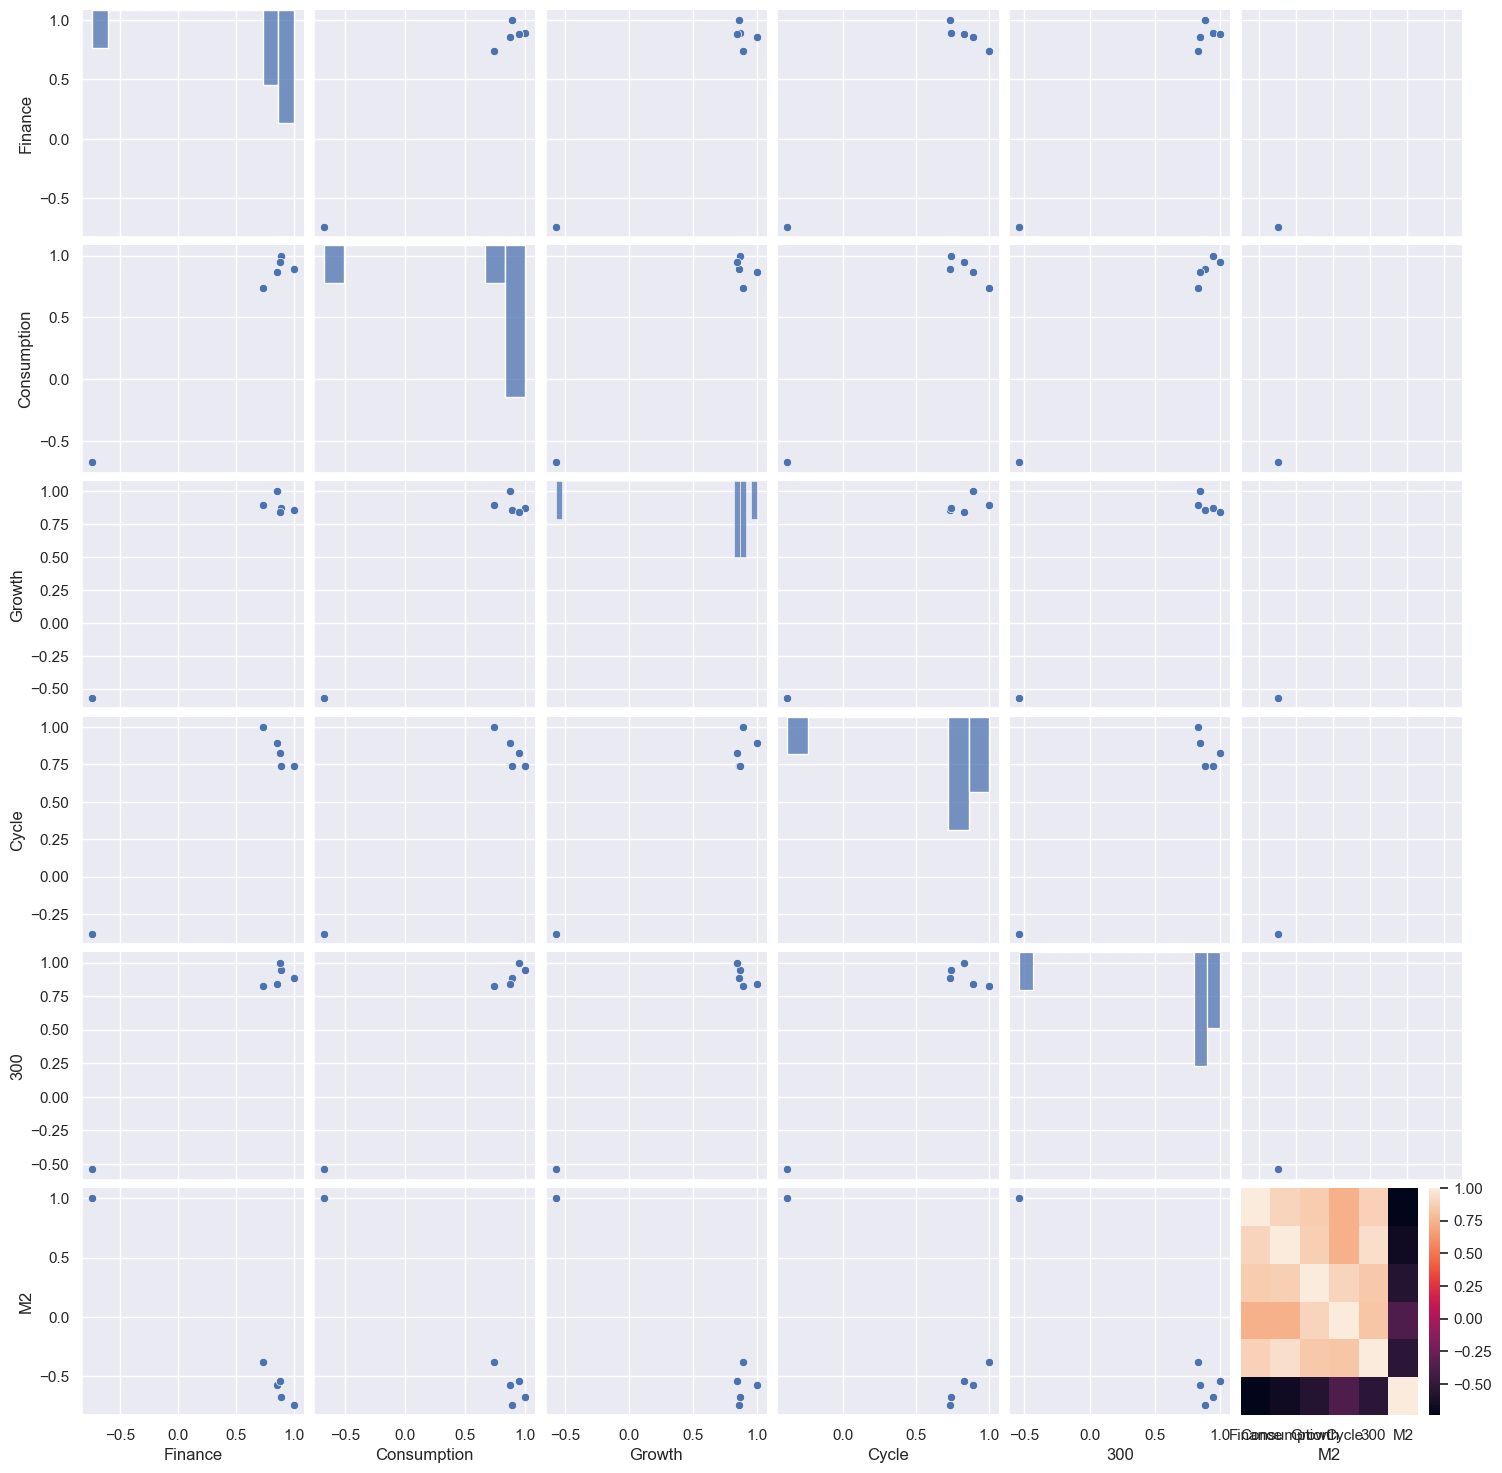

In [267]:
#heatmap
sns.heatmap(correlation)
plt.show() 

In [268]:
merged1 = merged1.apply(pd.to_numeric, errors='coerce')
# Check the type of columns
print(merged1.select_dtypes(include='object').columns)

Index([], dtype='object')


In [269]:
#Regression
#Analyze the intertemporal correlation between CSI 300 and M2, and try and error T+1, T+2, T+3 to find the intertemporal correlation with the largest correlation.
#The 5 stock index data are respectively used as dependent variables, and the independent variables of CPI, M2, industrial added value and fixed asset investment growth rate are regression.
import statsmodels.api as sm
independent_vars = ['CPI', 'M2', 'IVA', 'investment_on_fixed_assets']
for dependent_var in ['Finance', 'Consumption', 'Growth', 'Cycle', '300']:# can also write Index1
    data = pd.concat([merged1[dependent_var],merged1['CPI'],merged1['M2'],merged1['IVA'],merged1['investment_on_fixed_assets']], axis=1).dropna()
    X = data[independent_vars]
    y = data[dependent_var]
    
    X = sm.add_constant(X) # constant value
    
    model = sm.OLS(y, X).fit()
    print(f"Dependent Variable: {dependent_var}")
    print(model.summary())
    print("\n")


Dependent Variable: Finance
                            OLS Regression Results                            
Dep. Variable:                Finance   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     105.8
Date:                Sat, 04 May 2024   Prob (F-statistic):           4.82e-41
Time:                        03:43:13   Log-Likelihood:                -1171.2
No. Observations:                 143   AIC:                             2352.
Df Residuals:                     138   BIC:                             2367.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [270]:
#Mark all stages with CPI greater than 1.5 and M2 greater than 8, 
#count the number of stages (the stage starts once the conditions are met, 
#and the stage ends once the conditions are no longer met), 
#then calculate the return rate of CSI 300 stock index in each stage, 
#and then calculate the average return rate of stock index in all stages.
merged1.reset_index(inplace=True)
stage = []
stage_returns = []
Day = []
start_index = None

for i in range(len(M2)):
    if i in merged1.index and merged1.CPI[i] > 1.5 and merged1.M2[i] > 8:
        if start_index is None:  # If the stage begin
            start_index = i
        stage_return = merged1['300'].iloc[start_index:i].pct_change().mean() * 100
        if pd.notna(stage_return): # notice that there's NA,add this
            Day.append(merged1['Date'].iloc[i])
            stage_returns.append(stage_return)
    elif start_index is not None:  # If the stage ends 
        stage.append(True)
        start_index = None

# If the stage ends at the end of the data
if start_index is not None:
    stage.append(True)
    stage_return = merged1['300'].iloc[start_index:].pct_change().mean() * 100
    if pd.notna(stage_return):
        Day.append(Index1['Date'].iloc[-1])
        stage_returns.append(stage_return)

num_stages = len(stage_returns)
average_return = sum(stage_returns) / num_stages if num_stages > 0 else 0

print("Number of stages:", num_stages)
print("Returns of the Shanghai and Shenzhen 300 Index for each stage:", stage_returns)
print("Average return of the Shanghai and Shenzhen 300 Index for all stages:", average_return)


Number of stages: 88
Returns of the Shanghai and Shenzhen 300 Index for each stage: [2.265788615330644, 0.9514774967510575, -3.786586879843882, -3.8213579833780376, -3.351425956755729, -1.5452800949454206, -1.1855461178942999, 0.6880917018320651, 0.5907610209594466, 0.103861419788569, -0.2147454348940632, 0.12678734998147018, 0.30304996180232635, 0.3649588148733618, -0.08606915655736531, -0.3113704675152241, -0.09641909761179891, -0.4539146671685072, -0.7297436042399243, -0.8600553287737539, -0.7277062433090099, -1.1198227733521886, -1.0926917340521414, -0.794871499546918, -0.6950581100731967, -0.6982664453606009, -0.5818241917038486, -0.7031812559422495, -0.8478545046781218, -0.9455292674046681, -1.005707759415144, -0.9135866270771457, -0.9968873365967527, -0.8119683070837864, -0.47376232817565755, -0.348071140978318, -0.45258559665327536, -0.5415424631608289, -0.43681596368389036, -0.6164051133271583, -0.7438180197600677, -0.6443964172782001, -0.515879209706352, -0.5017075174659983, 

In [271]:
Returns=pd.DataFrame({'Day':Day,'Stage_returns':stage_returns})
Returns.head()

,Day,Stage_returns
0,NaN,2.265789
1,NaN,0.951477
2,NaN,-3.786587
3,NaN,-3.821358
4,NaN,-3.351426
